In [1]:
import sympy
sympy.init_printing()

In this notebook we derive the self similar ordinary differential equations for the problem of a point gravity explosion. We begin from the one dimensional hydrodynamic partial differential equations

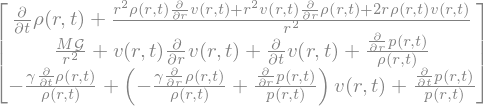

In [2]:
rho = sympy.Function('rho', positive=True) # Density
v = sympy.Function('v', positive=True) # Velocity
p = sympy.Function('p', positive=True) # Pressure
r = sympy.Symbol('r', positive=True) # Radius
t = sympy.Symbol('t', positive=True) # Time
gamma = sympy.Symbol('gamma', positive=True) # Adiabatic index
Gc = sympy.Symbol(r'\mathcal{G}', positive=True) # Gravitation constant
M = sympy.Symbol('M', positive=True) # Point mass

def div(expr):
    
    return (r**2*expr).diff(r)/r**2

# Governing equations
mass_conservation = rho(r,t).diff(t) + div(rho(r,t)*v(r,t))
momentum_conservation = v(r,t).diff(t) + v(r,t)*v(r,t).diff(r)+p(r,t).diff(r)/rho(r,t) + Gc*M/r**2
entropy = sympy.log(p(r,t)) - gamma*sympy.log(rho(r,t))
energy_conservation = entropy.diff(t) + v(r,t)*entropy.diff(r)
governing_equations = sympy.Matrix([mass_conservation,
                                    momentum_conservation,
                                    energy_conservation])
governing_equations

Reduction to self similar ordinary differential equations

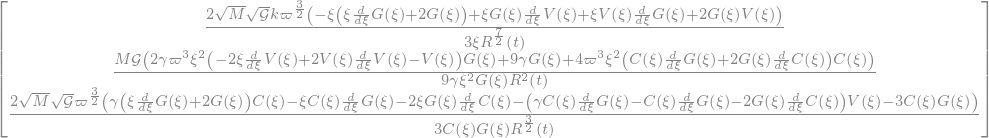

In [3]:
c = sympy.Function('c', positive=True) # Sound speed
R = sympy.Function('R', positive=True) # Shock position
G = sympy.Function('G', positive=True) # Dimensionless density
V = sympy.Function('V', positive=True) # Dimensionless velocity
C = sympy.Function('C', positive=True) # Dimensionless sound speed
xi = sympy.Symbol('xi', positive=True) # Dimensionless radius
k = sympy.Symbol('k', positive=True) # Density constant
delta = sympy.Symbol('delta', real=True) # Shock velocity radius power law index
chi = sympy.Symbol('chi', positive=True) # Radius ratio
varpi = sympy.Symbol('varpi', positive=True) # Radius time relation prefactor
temp = governing_equations
temp = temp.subs(p(r,t), rho(r,t)*c(r,t)**2/gamma)
temp = temp.subs(rho(r,t), k*G(r/R(t))/R(t)**2)
temp = temp.subs(v(r,t), R(t).diff(t)*V(r/R(t)))
temp = temp.subs(c(r,t), R(t).diff(t)*C(r/R(t)))
temp = temp.doit()
temp = temp.subs(R(t).diff(t,2), delta*R(t).diff(t)**2/R(t))
temp = temp.subs(r, xi*R(t))
temp = temp.subs(delta, sympy.Rational(-1,2))
temp = temp.subs(R(t).diff(t), sympy.Rational(2,3)*varpi**sympy.Rational(3,2)*sympy.sqrt(Gc*M/R(t)))
temp = temp.doit()
temp.simplify()
self_similar_equations = temp
self_similar_equations

Solving for the derivatives

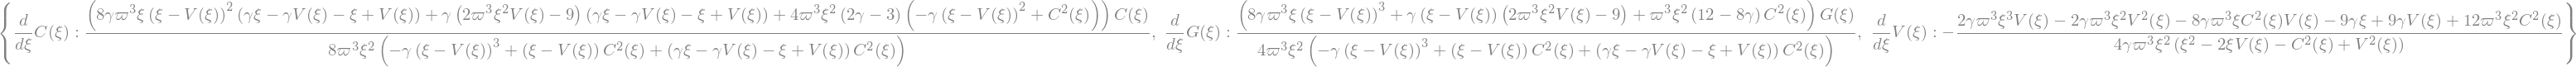

In [4]:
temp = sympy.solve(self_similar_equations,[var(xi).diff(xi) for var in [G,C,V]])
self_similar_derivatives = temp
self_similar_derivatives